In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_url = './housing.data' #Data URL
df_data = pd.read_csv(data_url, sep='\s+', header = None) #csv 타입 데이터 로드, separate는 빈공간으로 지정하고, Column은 없음
df_data.columns = [
    'CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO' ,'B', 'LSTAT', 'MEDV'] 
# Column Header 이름 지정
df_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


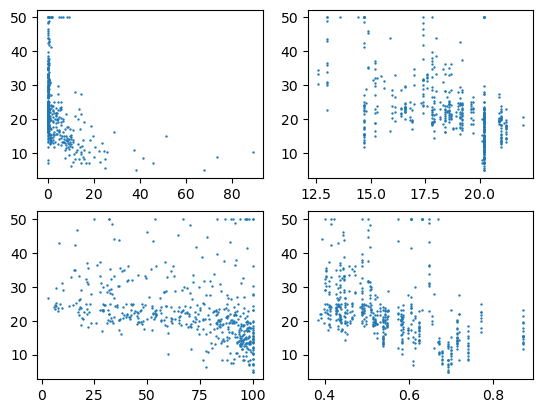

In [8]:
fig = plt.figure()
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))

ax[0].scatter(df_data["CRIM"], df_data["MEDV"], s =0.5)
ax[1].scatter(df_data["PTRATIO"], df_data["MEDV"], s =0.5 )
ax[2].scatter(df_data["AGE"], df_data["MEDV"], s =0.5)
ax[3].scatter(df_data["NOX"], df_data["MEDV"], s =0.5)
plt.show()

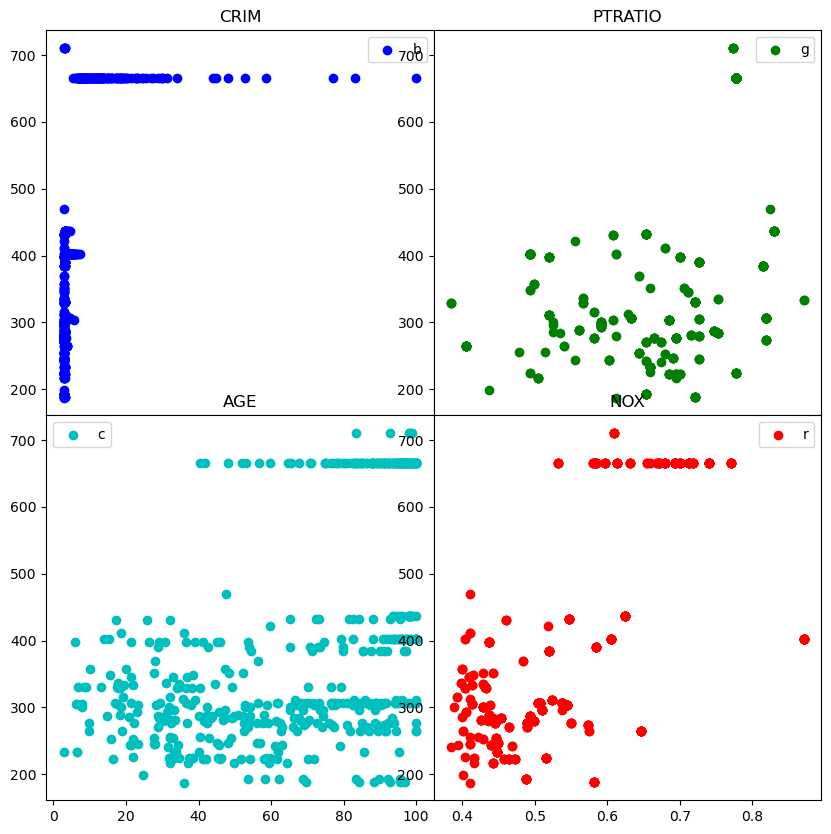

In [13]:
fig = plt.figure()
fig.set_size_inches(10.0, 10.0, forward = True)
ax = []
for i in range(1,5):
    ax.append(fig.add_subplot(2,2,i))
columns = ["CRIM", "PTRATIO", "AGE", "NOX"]
colors = ["b", "g", "c", "r"]
for i in range(4):
    ax[i].scatter(df_data[columns[i]], df_data["TAX"], color=colors[i], label = colors[i])
    ax[i].legend()
    ax[i].set_title(columns[i])

plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

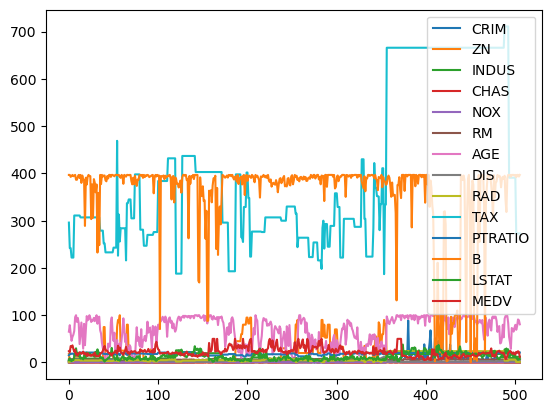

In [11]:
df_data.plot()
plt.show()

<AxesSubplot: >

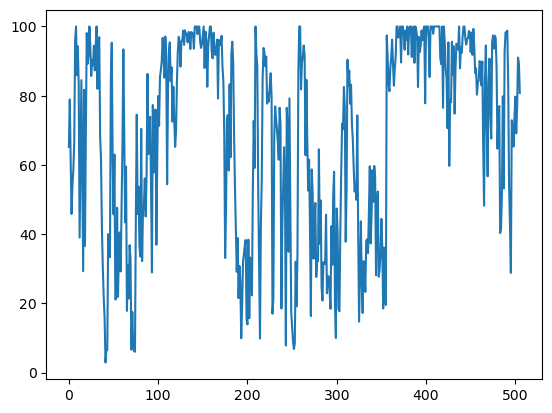

In [22]:
df_data["AGE"].plot(kind="line")

<AxesSubplot: >

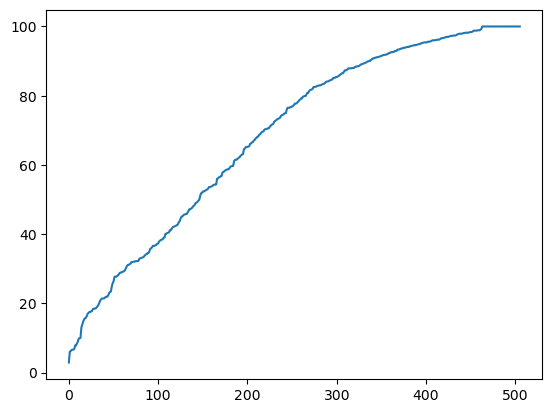

In [31]:
df_data["AGE"].sort_values().reset_index(drop=True).plot(kind="line")

<AxesSubplot: xlabel='AGE', ylabel='MEDV'>

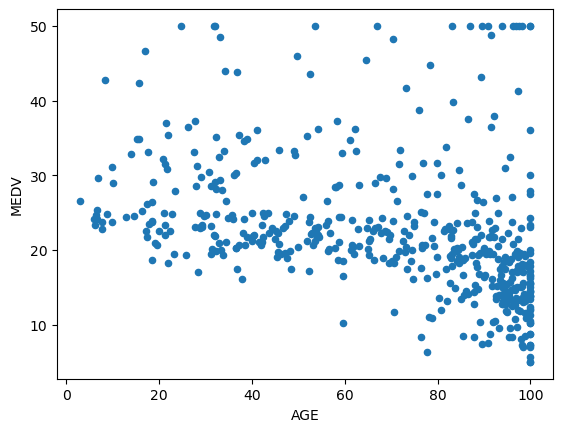

In [32]:
df_data.plot(kind="scatter", x="AGE", y="MEDV")

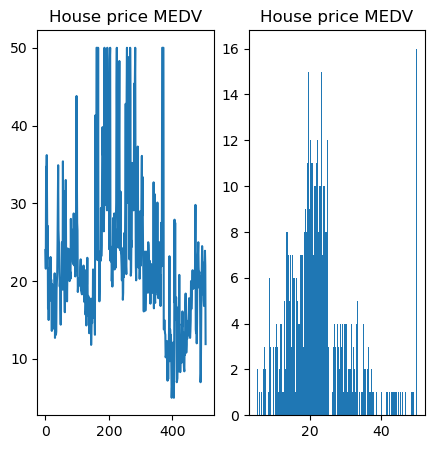

In [15]:
fig = plt.figure()
fig.set_size_inches(5,5)
ax_1 = fig.add_subplot(1,2,1)
ax_2 = fig.add_subplot(1,2,2)
ax_1.plot(df_data["MEDV"])
ax_2.hist(df_data["MEDV"], bins=150)
ax_1.set_title("House price MEDV")
ax_2.set_title("House price MEDV")
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scale_data = std_scaler.fit_transform(df_data)
scale_data

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.15968566],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937, -0.10152429],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  1.32424667],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.14880191],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163, -0.0579893 ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833, -1.15724782]])

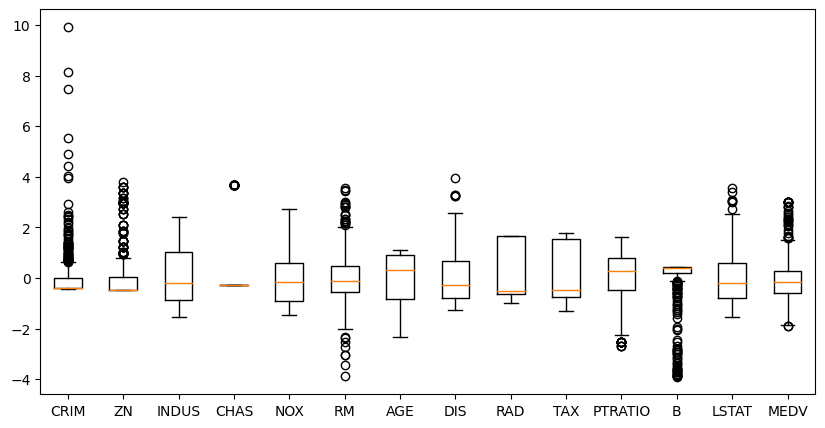

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.boxplot(scale_data, labels=df_data.columns)
fig.set_size_inches(10,5)
plt.show()

In [58]:
import plotly.express as px

px.scatter_matrix(df_data, diag="kde", height=800)


TypeError: scatter_matrix() got an unexpected keyword argument 'diag'

In [59]:
corr_data = np.corrcoef(scale_data.T[:5])
corr_data

array([[ 1.        , -0.20046922,  0.40658341, -0.05589158,  0.42097171],
       [-0.20046922,  1.        , -0.53382819, -0.04269672, -0.51660371],
       [ 0.40658341, -0.53382819,  1.        ,  0.06293803,  0.76365145],
       [-0.05589158, -0.04269672,  0.06293803,  1.        ,  0.09120281],
       [ 0.42097171, -0.51660371,  0.76365145,  0.09120281,  1.        ]])

In [60]:
corr_data.shape

(5, 5)

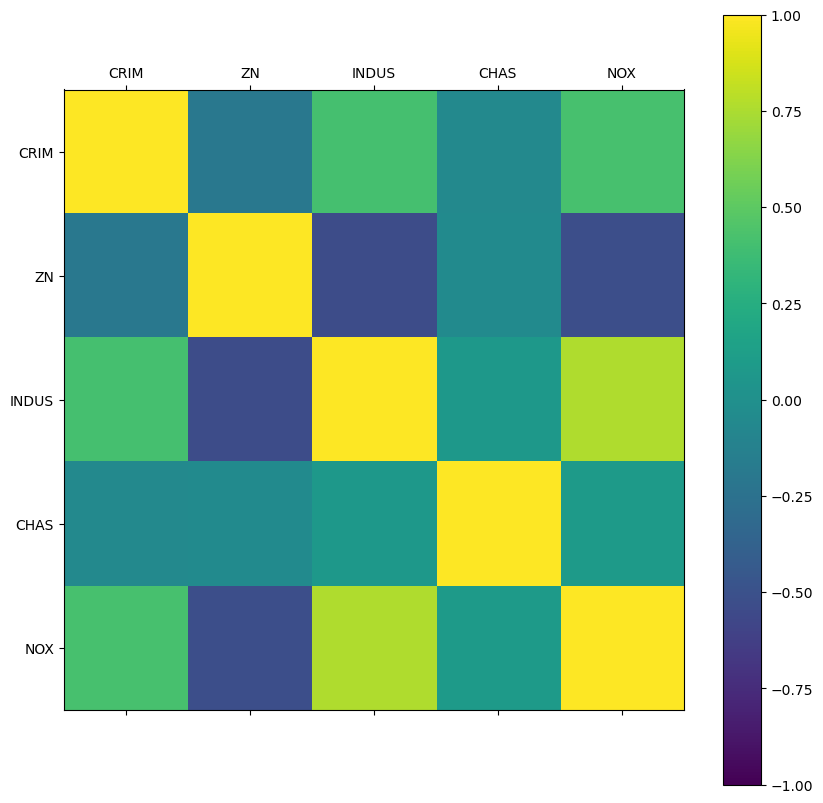

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr_data, vmin = -1, vmax=1, interpolation='nearest')
fig.colorbar(cax)
fig.set_size_inches(10,10)
ticks = np.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(df_data.columns[:5])
ax.set_yticklabels(df_data.columns[:5])
plt.show()
